In [1]:
# Cálculo de algunas características fisiográficas de cuencas.

import numpy as np
import pandas as pd

from scipy import optimize
from scipy import integrate

from matplotlib import pyplot as plt

import geopandas as gpd

In [2]:
# Tarea clase 8.
# 1. calcular la pendiente para el río Sonora por
# desnivel medio y por áreas compensadas y comparar.
# Utilizar UTM 12N (m) EPSG:32612 (https://epsg.io/32612)
# 2. Para las dos subcuencas calcula la densidad
# de corrientes, la densidad de drenaje, y el orden de la cuenca.
# Para el orden, utiliza la columna "ORDER".

In [3]:
# Dirección de los datos.
path = "../Material/Clases/Clase 8/"

# Nombres de las cuencas.
nombres_sub = ["RH12Ai_subc.shp", "RH19Be_subc.shp"]
nombres_c   = ["RH12Ai_curvas.shp", "RH19Be_curvas.shp"]
nombres_r   = ["Río Sonora.shp", "Coords Río Sonora.shp"]

# Lista con las cuencas.
# Creamos una lista vacía que llenaremos luego
Cuencas = [None, None]
Curvas  = [None, None]
Rios    = [None, None]

In [4]:
# Abrimos la primera subcuenca.
i = 0

Cuencas[i] = gpd.read_file(path + nombres_sub[i])

# A coordenadas UTM 14N (m) (EPSG:32614).
Cuencas[i] = Cuencas[i].to_crs(32614)

# Datos.
print(Cuencas[i].loc[0])

# Forma de la cuenca.
Cuencas[i].explore()

ID                                                        303.0
CVE_SUBCUE                                               RH12Ai
CVE_RH                                                     RH12
RH                                             LERMA - SANTIAGO
CVE_CUE                                                       A
CUENCA                                        R. LERMA - TOLUCA
CVE_SUBC                                                      i
SUBCUENCA                                              R. Gavia
AREA_KM2                                                 579.87
PERIMETRO                                                119.92
TIPO                                                    ABIERTA
DRENAJE1                                                 RH12Ab
DESCARGA1                                                     1
DRENAJE2                                                      -
DESCARGA2                                                     0
DRENAJE3                                

In [5]:
# Abrimos la segunda subcuenca.
i = 1

Cuencas[i] = gpd.read_file(path + nombres_sub[i])

# A coordenadas UTM 14N (m) (EPSG:32614).
Cuencas[i] = Cuencas[i].to_crs(32614)

# Datos.
print(Cuencas[i].loc[0])

# Forma de la cuenca.
Cuencas[i].explore()

ID                                                        155.0
CVE_SUBCUE                                               RH19Be
CVE_RH                                                     RH19
RH                                                 COSTA GRANDE
CVE_CUE                                                       B
CUENCA                                    R. COYUQUILLA Y OTROS
CVE_SUBC                                                      e
SUBCUENCA                                           R. Petatlán
AREA_KM2                                                 548.64
PERIMETRO                                                142.88
TIPO                                                    ABIERTA
DRENAJE1                                                 RH19Bf
DESCARGA1                                                     1
DRENAJE2                                                      -
DESCARGA2                                                     0
DRENAJE3                                

In [6]:
# Cargamos la información del Río San Fernando.

for i in range( len(Rios) ):
    Rios[i] = gpd.read_file(path + nombres_r[i])
    # Mexico ITRF92 UTM 14N (EPSG:32614).
    Rios[i] = Rios[i].to_crs(32614)

# Nube de puntos con información de cotas.
print( Rios[1].head() )

   FNODE_  TNODE_  LPOLY_  RPOLY_   LENGTH  COV_  COV_ID    NOMBRES  distance  \
0     426     427       0       0  2.38878  1097    1709  R. Sonora      0.00   
1     426     427       0       0  2.38878  1097    1709  R. Sonora      0.01   
2     426     427       0       0  2.38878  1097    1709  R. Sonora      0.02   
3     426     427       0       0  2.38878  1097    1709  R. Sonora      0.03   
4     426     427       0       0  2.38878  1097    1709  R. Sonora      0.04   

       angle      xcoord     ycoord  zcoord      Distancia              x  \
0  190.20399 -109.897192  30.864662    1682  289459.288785  467599.413374   
1  190.20399 -109.898964  30.854820    1606    1118.674332  468718.087706   
2  190.20399 -109.900735  30.844978    1393    1118.683383  469836.771089   
3  190.20399 -109.902507  30.835136    1384    1118.692436  470955.463524   
4  190.20399 -109.904279  30.825294    1273    1118.701490  472074.165015   

                          geometry  
0  POINT (-54

In [7]:
'''
# Ajustes shapefile río San Fernando.

Rios[1]["zcoord"] = np.nansum( [ Rios[1]["SAMPLE_1"],
    Rios[1]["SAMPLE_1_2"] ], axis = 0 )
Rios[1].drop(["SAMPLE_1", "SAMPLE_1_2"], axis = 1, inplace = True)

s_fer   = Rios[1][Rios[1]["NOMBRES"] == "R. San Fernando"].sort_values(
    "distance", ascending = False)
conchos = Rios[1][Rios[1]["NOMBRES"] == "R. Conchos"].sort_values(
    "distance", ascending = False)
potosi  = Rios[1][Rios[1]["NOMBRES"] == "R. Potosi"].sort_values(
    "distance", ascending = False)

Rios[1] = pd.concat( [conchos, s_fer], axis = 0 )
Rios[1].reset_index(drop = True, inplace = True)

Rios[1].to_file(path + "Coords Río San Fernando.shp")
'''

'\n# Ajustes shapefile río San Fernando.\n\nRios[1]["zcoord"] = np.nansum( [ Rios[1]["SAMPLE_1"],\n    Rios[1]["SAMPLE_1_2"] ], axis = 0 )\nRios[1].drop(["SAMPLE_1", "SAMPLE_1_2"], axis = 1, inplace = True)\n\ns_fer   = Rios[1][Rios[1]["NOMBRES"] == "R. San Fernando"].sort_values(\n    "distance", ascending = False)\nconchos = Rios[1][Rios[1]["NOMBRES"] == "R. Conchos"].sort_values(\n    "distance", ascending = False)\npotosi  = Rios[1][Rios[1]["NOMBRES"] == "R. Potosi"].sort_values(\n    "distance", ascending = False)\n\nRios[1] = pd.concat( [conchos, s_fer], axis = 0 )\nRios[1].reset_index(drop = True, inplace = True)\n\nRios[1].to_file(path + "Coords Río San Fernando.shp")\n'

In [8]:
'''
# Ajustes Shapefile Río Sonora.

u = Rios[1]["FNODE_"].unique()
u = [391, 397, 0, 426]
t = [None] * len(u)

for i in range(len(u)):
    t[i] = Rios[1][Rios[1]["FNODE_"] == u[i]
        ].sort_values( "distance", ascending = True)

Rios[1] = pd.concat( t[::-1], axis = 0 )
Rios[1].reset_index(drop = True, inplace = True)
Rios[1].rename({"SAMPLE_1": "zcoord"}, axis = 1, inplace = True)
Rios[1].to_file(path + "Coords Río Sonora.shp")
'''

'\n# Ajustes Shapefile Río Sonora.\n\nu = Rios[1]["FNODE_"].unique()\nu = [391, 397, 0, 426]\nt = [None] * len(u)\n\nfor i in range(len(u)):\n    t[i] = Rios[1][Rios[1]["FNODE_"] == u[i]\n        ].sort_values( "distance", ascending = True)\n\nRios[1] = pd.concat( t[::-1], axis = 0 )\nRios[1].reset_index(drop = True, inplace = True)\nRios[1].rename({"SAMPLE_1": "zcoord"}, axis = 1, inplace = True)\nRios[1].to_file(path + "Coords Río Sonora.shp")\n'

In [9]:
# Vector del río.
Rios[0].explore()

In [17]:
print(x_i)
print(x_f)
print(z_i)
print(z_f)

0.0
353263.1875390779
1682
18


In [10]:
# Desplazamos las coordenadas un lugar.
gs = Rios[1]["geometry"].shift(1)
# Calculamos la distancia entre dos puntos adyacentes.
Rios[1]["Distancia"] = Rios[1]["geometry"].distance(gs)
# La posición del primer punto es 0, para los demás es una suma acumulada.
Rios[1].loc[0, "Distancia"] = 0
Rios[1]["x"] = Rios[1]["Distancia"].cumsum()

# Guardamos la distancia y la cota en otras variables.
x = Rios[1]["x"]
z = Rios[1]["zcoord"]

# Escogemos los valores iniciales y finales.
x_i = x.to_numpy()[0]
x_f = x.to_numpy()[-1]
z_f = z.to_numpy()[-1]
z_i = z.to_numpy()[0]

Rios[1]

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,NOMBRES,distance,angle,xcoord,ycoord,zcoord,Distancia,x,geometry
0,426,427,0,0,2.38878,1097,1709,R. Sonora,0.00,190.203990,-109.897192,30.864662,1682,0.000000,0.000000,POINT (-544767.518 3465960.042)
1,426,427,0,0,2.38878,1097,1709,R. Sonora,0.01,190.203990,-109.898964,30.854820,1606,1118.674332,1118.674332,POINT (-545046.999 3464876.842)
2,426,427,0,0,2.38878,1097,1709,R. Sonora,0.02,190.203990,-109.900735,30.844978,1393,1118.683383,2237.357715,POINT (-545326.485 3463793.634)
3,426,427,0,0,2.38878,1097,1709,R. Sonora,0.03,190.203990,-109.902507,30.835136,1384,1118.692436,3356.050151,POINT (-545605.978 3462710.418)
4,426,427,0,0,2.38878,1097,1709,R. Sonora,0.04,190.203990,-109.904279,30.825294,1273,1118.701490,4474.751641,POINT (-545885.478 3461627.195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,391,0,0,0,0.16656,1094,323,R. Sonora,0.12,164.462655,-111.379960,28.521935,27,1119.199106,348795.395078,POINT (-716474.801 3218411.330)
328,391,0,0,0,0.16656,1094,323,R. Sonora,0.13,164.462655,-111.377281,28.512300,25,1119.198383,349914.593461,POINT (-716322.636 3217302.524)
329,391,0,0,0,0.16656,1094,323,R. Sonora,0.14,161.243587,-111.374489,28.502701,22,1118.117165,351032.710626,POINT (-716158.669 3216196.495)
330,391,0,0,0,0.16656,1094,323,R. Sonora,0.15,161.243587,-111.371273,28.493232,20,1115.238474,352147.949100,POINT (-715951.182 3215100.728)


In [11]:
# Recta de compensación.
def rect_comps(z_r):
    z = (z_f - z_r ) / (x_f - x_i) * (x - x_f) + z_f
    return z

# Integral de áreas compensadas.
def area_comps(z_r):
    a = rect_comps(z_r)
    I = integrate.simpson(z - a)
    return I
    

Pendiente [m/km]: [2.80476912]


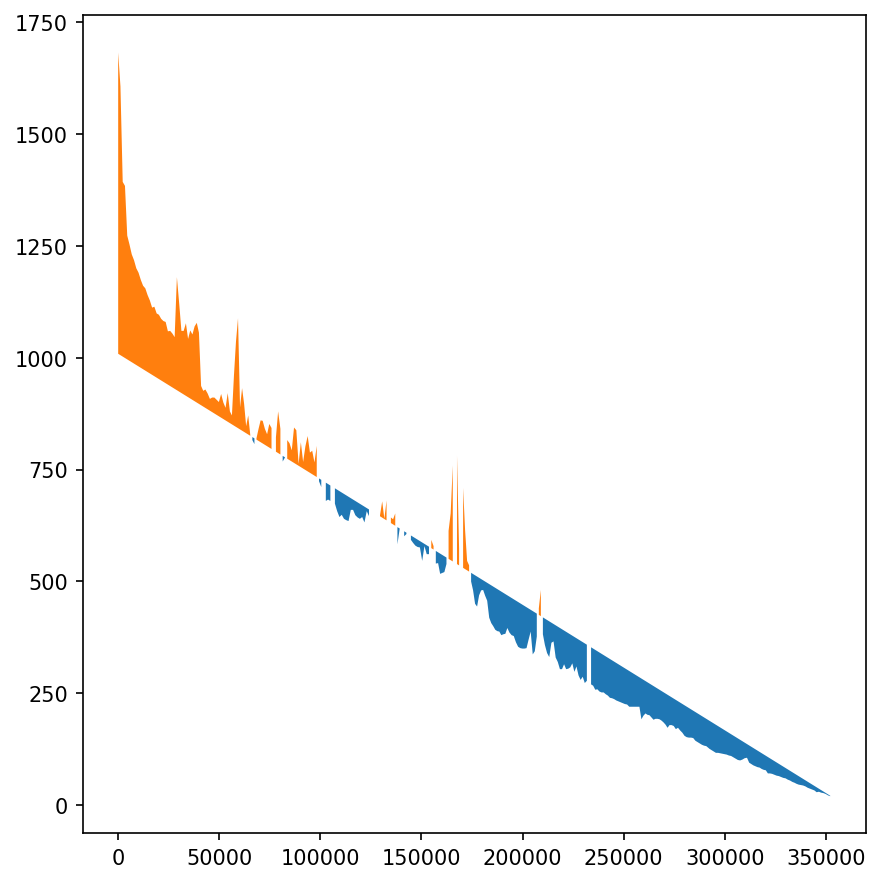

In [12]:
# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos el perfil del río.
#ax.plot(x, z)

# Encontramos la cota z_r que compensa las áreas.
# Primer intento: z_i
z_r = optimize.fsolve(area_comps, x0 = z_i)

# Graficamos la recta compensada.
z_2 = rect_comps(z_r)
#ax.plot(x, z_2)

# Dibujamos las áreas compensadas.
ax.fill_between( x, z, z_2, where = z < z_2 )
ax.fill_between( x, z, z_2, where = z > z_2 )

# Pendiente.
S = (z_r - z_f ) / (x_f - x_i)
print(f"Pendiente [m/km]: {S * 1000}")

fig.tight_layout()
plt.show()

In [13]:
nombres_hl = ["RH12Ai_hl.shp", "RH19Be_hl.shp"]
HL = [None] * len(nombres_hl)

# Abrimos las subcuencas.
for i in range( len(nombres_hl) ):
    HL[i] = gpd.read_file(path + nombres_hl[i])

    # A coordenadas UTM 14N (m) (EPSG: 32614).
    HL[i] = HL[i].to_crs(32614)

# Datos.
HL[0].head()

,ID,CVE_SUBC,CLAVE50K,TIPO,ENTIDAD,FC,CONDICION,EDICION,FECHA,LENGTHM,...,FLOWDIR,ENABLED,DESC_ENABL,CALI_REPR,SEQUENCEID,ORDER_1,LEVEL_1,ARBSUM_1,PATHL_1,geometry
0,6283246,RH12Ai,e14a37,101,CORRIENTE DE AGUA,3271,INTERMITENTE,O,1996-01-31,99.4970,...,1,1,None,0,543.0,3,3,1.118147e+04,23742.8254,"LINESTRING (420780.371 2141316.700, 420775.255..."
1,6283247,RH12Ai,e14a37,101,CORRIENTE DE AGUA,3271,INTERMITENTE,O,1996-01-31,238.5890,...,1,1,None,0,1825.0,2,3,1.022193e+03,13915.9591,"LINESTRING (413756.581 2149747.126, 413745.369..."
2,6283248,RH12Ai,e14a37,101,CORRIENTE DE AGUA,3272,PERENNE,O,1996-01-31,119.6795,...,1,1,None,0,34.0,6,1,1.462286e+06,2423.5314,"LINESTRING (418896.810 2154627.937, 418902.380..."
3,6283249,RH12Ai,e14a37,101,CORRIENTE DE AGUA,3272,PERENNE,O,1996-01-31,44.8832,...,1,1,None,0,2356.0,4,2,1.004666e+05,23793.2637,"LINESTRING (409227.461 2145825.808, 409218.867..."
4,6283250,RH12Ai,e14a37,103,LINEA CENTRAL,3273,FLUJO VIRTUAL,N,2008-01-11,60.9720,...,1,1,None,3,2190.0,2,3,2.016882e+03,22155.2684,"LINESTRING (406970.250 2152179.552, 406970.249..."


In [14]:
# Forma de la cuenca.
HL[i].explore()

In [15]:
# Densidad de drenaje y orden de la cuenca.

Dd  = [None] * len( Cuencas )
Dc  = [None] * len( Cuencas )
Ord = [None] * len( Cuencas )

Cuencas[0].area / 1000 ** 2

for i in range( len( Cuencas ) ):
    # Area de la cuenca en km2.
    A = Cuencas[i].area / 1000 ** 2
    # Densidad de drenaje.
    Dd[i]  = ( ( HL[i]["LENGTHM"].sum() / 1000 ) / A )[0]
    # Densidad de corrientes.
    Dc[i]  = ( HL[i].shape[0] / A )[0]
    # Orden de la cuenca.
    Ord[i] = HL[i]["ORDER_1"].max()

    print(f"Subcuenca: {Cuencas[i].loc[0, 'SUBCUENCA']}")
    print(f"Densidad de drenaje   : {Dd[i]:.3f}")
    print(f"Densidad de corrientes: {Dd[i]:.3f} corrientes/km2")
    print(f"Orden de la subcuenca : {Ord[i]}")
    print()

Subcuenca: R. Gavia
Densidad de drenaje   : 2.544
Densidad de corrientes: 2.544 corrientes/km2
Orden de la subcuenca : 6

Subcuenca: R. Petatlán
Densidad de drenaje   : 1.928
Densidad de corrientes: 1.928 corrientes/km2
Orden de la subcuenca : 5

